In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# basic plot variales
pd.options.display.max_columns = 100
blue = '#3298D0'
plot_size = (14, 10)

## Load data

In [3]:
#load data
DATA_FILE = "Data/nba-players-stats/Seasons_Stats.csv"

def load_NBA_data(url):
    return pd.read_csv(url)

nba_data = load_NBA_data(DATA_FILE)

## Data cleaning
- Drop columns don't needed
- Delete NA and inf values
- Correct dtypes values

In [4]:
#Dataset info
print(nba_data.columns)
#24,691 entries

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [5]:
# Dates formatting
nba_data['Year'] =  pd.to_datetime(nba_data['Year'])
nba_data['year'] = nba_data['Year'].astype('int64')

In [6]:
nba_data = nba_data.fillna(0)

In [7]:
# New data types
nba_data['Pos'] = nba_data['Pos'].astype('category')
nba_data['Pos'] = nba_data['Pos'].astype('category')

#stats to int32
list_stats_int = ['ORB', 'DRB', 'TRB', 'AST', 
                  'STL', 'BLK', 'TOV', 'PF', 
                  'PTS', '3P', '3P%', 'G', 'Age', 
                  'PTS', 'MP', '3PA']
for ls in list_stats_int:
    nba_data[ls] = nba_data[ls].astype('int32')

In [8]:
# Delete colum ns
nba_data = nba_data.drop(columns = ['Year', 'blanl', 'blank2', 'Unnamed: 0'])

In [9]:
nba_data.sample(5)

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
15194,Mark Jackson,PG,35,TOR,54,54.0,1802,16.3,0.528,0.409,0.189,2.6,9.2,5.8,41.3,1.8,0.3,21.1,13.7,3.5,1.2,4.7,0.125,1.7,-2.1,-0.4,0.7,170.0,403.0,0.422,57,165,0,113.0,238.0,0.475,0.493,64.0,76.0,0.842,42,143,185,498,63,7,117,83,461,2001
8738,Steve Colter,PG,25,WSB,56,53.0,1361,13.4,0.509,0.025,0.214,4.1,8.6,6.4,24.5,2.0,0.6,14.9,15.6,1.3,1.3,2.5,0.090,0.0,0.3,0.3,0.8,188.0,401.0,0.469,3,10,0,185.0,391.0,0.473,0.473,68.0,86.0,0.791,51,104,155,235,56,14,77,112,447,1988
4086,Art Williams,PG,34,BOS,67,0.0,617,14.7,0.475,0.000,0.190,3.2,14.5,9.0,33.1,3.1,0.2,0.0,0.0,0.1,1.1,1.2,0.096,-0.8,1.3,0.6,0.4,73.0,168.0,0.435,0,0,0,73.0,168.0,0.435,0.435,27.0,32.0,0.844,20,95,115,163,44,3,0,100,173,1974
5213,Scott Lloyd,C,25,TOT,70,0.0,678,9.2,0.469,0.000,0.352,8.2,14.6,11.4,8.5,0.9,1.1,16.2,15.5,0.2,0.4,0.6,0.042,-2.8,-1.1,-3.9,-0.3,80.0,193.0,0.415,0,0,0,80.0,193.0,0.415,0.415,49.0,68.0,0.721,52,93,145,44,14,14,43,105,209,1978
9561,John Bagley,PG,29,BOS,54,17.0,1095,10.8,0.489,0.083,0.179,2.8,6.0,4.5,33.3,1.8,0.2,27.7,12.5,0.3,0.8,1.1,0.047,-2.4,-1.8,-4.2,-0.6,100.0,218.0,0.459,1,18,0,99.0,200.0,0.495,0.461,29.0,39.0,0.744,26,63,89,296,40,4,90,77,230,1990


## Filter data from 1980

In [10]:
#select only data since 1980
filtered_data = nba_data[nba_data.year > 1979 ]
filtered_data.sort_values(by='year', ascending = True)

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
5727,Kareem Abdul-Jabbar*,C,32,LAL,82,0.0,3143,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0,1,0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190,696,886,371,81,280,297,216,2034,1980
5970,Eric Money,SG,24,DET,55,0.0,1467,11.7,0.539,0.000,0.204,2.0,5.0,3.5,21.8,1.6,0.4,20.5,18.3,0.6,0.2,0.8,0.026,-1.6,-2.7,-4.3,-0.9,259.0,510.0,0.508,0,0,0,259.0,510.0,0.508,0.508,81.0,104.0,0.779,28,69,97,238,53,10,143,135,599,1980
5969,Eric Money,PG,24,PHI,6,0.0,82,4.4,0.407,0.000,0.056,4.1,4.9,4.5,27.2,0.0,0.7,24.5,23.8,-0.2,0.1,-0.2,-0.094,-6.8,-3.9,-10.7,-0.2,14.0,36.0,0.389,0,0,0,14.0,36.0,0.389,0.389,2.0,2.0,1.000,3,4,7,16,0,1,12,11,30,1980
5968,Eric Money,SG-PG,24,TOT,61,0.0,1549,11.4,0.531,0.000,0.194,2.1,5.0,3.5,22.1,1.5,0.4,20.7,18.6,0.4,0.3,0.6,0.020,-1.8,-2.8,-4.7,-1.0,273.0,546.0,0.500,0,0,0,273.0,546.0,0.500,0.500,83.0,106.0,0.783,31,73,104,254,53,11,155,146,629,1980
5967,Sidney Moncrief,SG,22,MIL,77,0.0,1557,15.9,0.564,0.002,0.647,11.1,12.5,11.8,10.7,2.2,0.6,16.8,17.8,2.8,2.0,4.9,0.150,0.9,0.7,1.7,1.4,211.0,451.0,0.468,0,1,0,211.0,450.0,0.469,0.468,232.0,292.0,0.795,154,184,338,133,72,16,117,106,654,1980
5966,Paul Mokeski,C,23,HOU,12,0.0,113,4.4,0.392,0.000,0.273,13.3,15.1,14.2,2.2,0.4,3.0,21.3,16.4,-0.2,0.1,-0.1,-0.041,-6.1,-1.6,-7.7,-0.2,11.0,33.0,0.333,0,0,0,11.0,33.0,0.333,0.333,7.0,9.0,0.778,14,15,29,2,1,6,10,24,29,1980
5965,Steve Mix,SF,32,PHI,81,0.0,1543,19.5,0.577,0.014,0.354,8.3,11.5,10.0,14.8,2.0,0.3,14.0,24.5,3.4,2.1,5.5,0.172,1.9,-0.8,1.1,1.2,363.0,703.0,0.516,4,10,0,359.0,693.0,0.518,0.519,207.0,249.0,0.831,114,176,290,149,67,9,132,114,937,1980
5964,Mike Mitchell,SF,24,CLE,82,0.0,2802,19.1,0.557,0.004,0.231,7.4,15.2,11.1,4.9,1.1,1.5,9.5,24.7,5.9,2.4,8.3,0.142,1.7,-1.4,0.3,1.6,775.0,1482.0,0.523,0,6,0,775.0,1476.0,0.525,0.523,270.0,343.0,0.787,206,385,591,93,70,77,172,259,1820,1980
5963,Dave Meyers,PF,26,MIL,79,0.0,2204,13.3,0.509,0.006,0.296,7.1,14.7,11.0,13.6,1.5,1.0,16.2,20.2,1.0,2.8,3.9,0.084,-0.8,0.7,-0.1,1.0,399.0,830.0,0.481,1,5,0,398.0,825.0,0.482,0.481,156.0,246.0,0.634,140,308,448,225,72,40,182,218,955,1980
5971,Earl Monroe*,SG,35,NYK,51,0.0,633,15.3,0.497,0.000,0.182,2.7,3.5,3.1,15.0,1.5,0.3,6.9,24.8,1.0,0.1,1.1,0.081,-0.8,-4.7,-5.5,-0.6,161.0,352.0,0.457,0,0,0,161.0,352.0,0.457,0.457,56.0,64.0,0.875,16,20,36,67,21,3,28,46,378,1980


# ML model

In [11]:
from sklearn.cluster import KMeans

## Preparing dataset

In [12]:
df = filtered_data.groupby(['Player']).agg({'3PA':'sum', 
                                            '3P':'sum', 
                                            'year':'count', 
                                            'PTS':'sum',
                                            'MP':'sum',
                                            'TRB':'sum',
                                            'AST':'sum',
                                            'BLK':'sum'
                                           })

In [13]:
df.sample(10)

,3PA,3P,year,PTS,MP,TRB,AST,BLK
Player,,,,,,,,
Rumeal Robinson,402,138,11,2853,7002,685,1315,59
Troy Williams,124,36,3,370,1114,138,50,20
William Avery,157,40,3,379,1205,93,199,6
Lance Blanks,75,19,3,289,1045,110,117,8
Dan O'Sullivan,1,0,6,89,314,71,11,5
Nate McMillan,870,298,12,4733,20462,3222,4893,356
Radisav Curcic,0,0,1,58,166,49,12,2
Antonis Fotsis,23,7,1,108,320,62,10,11
Lance Stephenson,768,242,12,3801,10626,1760,1273,60


In [14]:
# Create two new columns
df['3PA_per_season'] = round(df['3PA'] / df['year'], 2)
df['3P%_career'] = (round(df['3PA'] / df['3P'], 2)) * 10

#sort values by total 3P
df = df.sort_values(by='3P', ascending=False)

# Check dataset
print(df.count())
df.sample(10)

3PA               2835
3P                2835
year              2835
PTS               2835
MP                2835
TRB               2835
AST               2835
BLK               2835
3PA_per_season    2835
3P%_career        2457
dtype: int64


,3PA,3P,year,PTS,MP,TRB,AST,BLK,3PA_per_season,3P%_career
Player,,,,,,,,,,
Leonard Taylor,1,0,1,11,37,12,1,0,1.0,inf
Chris Babb,27,6,1,22,132,17,3,0,27.0,45.000000
Dave Batton,3,0,2,188,589,123,32,16,1.5,inf
Chubby Cox,2,0,1,29,78,10,6,1,2.0,inf
Jermaine O'Neal,96,14,20,14214,29391,7694,1491,1956,4.8,68.600000
Greg Dreiling,9,3,10,1014,4241,1018,186,137,0.9,30.000000
Raul Lopez,130,45,2,733,2135,194,428,5,65.0,28.900000
Cameron Bairstow,5,1,2,44,167,36,7,4,2.5,50.000000
Jordan Adams,26,10,2,101,263,30,19,7,13.0,26.000000


In [15]:
# Replace inf values with nan
df['3P%_career'] = df['3P%_career'].replace([np.inf, -np.inf], np.nan)

# Drop Na values
df = df.dropna()

In [16]:
print(df.count())
df.sample(20)

3PA               2007
3P                2007
year              2007
PTS               2007
MP                2007
TRB               2007
AST               2007
BLK               2007
3PA_per_season    2007
3P%_career        2007
dtype: int64


,3PA,3P,year,PTS,MP,TRB,AST,BLK,3PA_per_season,3P%_career
Player,,,,,,,,,,
John Drew,57,10,6,6981,9887,1884,543,52,9.50,57.0
Shawn Bradley,51,5,16,8657,24148,6517,688,2655,3.19,102.0
Pearl Washington,87,16,3,1660,4044,370,733,15,29.00,54.4
Tom Garrick,64,6,7,1496,5267,557,951,26,9.14,106.7
Thurl Bailey,37,4,14,12785,26977,5203,1376,1203,2.64,92.5
C.J. Watson,1263,471,10,4344,12093,1156,1485,67,126.30,26.8
Doug Lee,58,18,3,168,415,42,32,5,19.33,32.2
Travis Wear,30,11,1,199,672,106,40,11,30.00,27.3
Campy Russell,93,34,4,3118,6578,819,717,40,23.25,27.4


## Add info from another dataset

In [17]:
# Load personal data
path_to_players_profiles = ('data/nba-players-stats/player_data.csv')
player_profiles = load_NBA_data(path_to_players_profiles)

player_profiles = player_profiles.rename(index=str, columns={'name':'Player'})

In [18]:
player_profiles.head()

,Player,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [19]:
# Join tables
full_df = pd.merge(df, player_profiles, on='Player', how='inner')

full_df.head()
print(df.count())

3PA               2007
3P                2007
year              2007
PTS               2007
MP                2007
TRB               2007
AST               2007
BLK               2007
3PA_per_season    2007
3P%_career        2007
dtype: int64


In [20]:
# convert position to numeric value
full_df['position'].unique()
full_df['position'] = full_df['position'].astype('category')
# Label encoding
full_df["position_encoding"] = full_df["position"].cat.codes

In [21]:
# Convert height to numeric value
full_df['height'] = full_df['height'].str.replace('-','.')

In [22]:
# Convert height to float
full_df["height"] = full_df["height"].astype('float32')

In [23]:
full_df.isnull().any()

Player               False
3PA                  False
3P                   False
year                 False
PTS                  False
MP                   False
TRB                  False
AST                  False
BLK                  False
3PA_per_season       False
3P%_career           False
year_start           False
year_end             False
position             False
height               False
weight               False
birth_date           False
college               True
position_encoding    False
dtype: bool

In [24]:
full_df['college'] = full_df['college'].replace(np.NaN, 'None')

In [25]:
print(full_df[full_df.college.isnull()])
full_df.isnull().any()

Empty DataFrame
Columns: [Player, 3PA, 3P, year, PTS, MP, TRB, AST, BLK, 3PA_per_season, 3P%_career, year_start, year_end, position, height, weight, birth_date, college, position_encoding]
Index: []


Player               False
3PA                  False
3P                   False
year                 False
PTS                  False
MP                   False
TRB                  False
AST                  False
BLK                  False
3PA_per_season       False
3P%_career           False
year_start           False
year_end             False
position             False
height               False
weight               False
birth_date           False
college              False
position_encoding    False
dtype: bool

In [26]:
# Check for duplicates values
len(pd.concat(g for _, g in full_df.groupby("Player") if len(g) > 1))

61

In [27]:
# Drop duplicate rows
pd.concat(g for _, g in full_df.groupby('Player') if len(g) > 1)

,Player,3PA,3P,year,PTS,MP,TRB,AST,BLK,3PA_per_season,3P%_career,year_start,year_end,position,height,weight,birth_date,college,position_encoding
964,Bobby Jones,131,37,14,6086,14412,2652,1243,605,9.36,35.4,1975,1986,F,6.90,210.0,"December 18, 1951",University of North Carolina,2
965,Bobby Jones,131,37,14,6086,14412,2652,1243,605,9.36,35.4,2007,2008,F,6.70,215.0,"January 9, 1984",University of Washington,2
1434,Cedric Henderson,43,6,8,1907,6214,771,419,111,5.38,71.7,1987,1987,F,6.80,210.0,"October 3, 1965",University of Georgia,2
1435,Cedric Henderson,43,6,8,1907,6214,771,419,111,5.38,71.7,1998,2002,F,6.70,215.0,"March 11, 1975",University of Memphis,2
835,Charles Jones,194,59,23,3311,18909,4299,990,1331,8.43,32.9,1984,1998,F-C,6.90,215.0,"April 3, 1957",Albany State University,3
836,Charles Jones,194,59,23,3311,18909,4299,990,1331,8.43,32.9,1985,1989,F,6.80,215.0,"January 12, 1962",University of Louisville,2
837,Charles Jones,194,59,23,3311,18909,4299,990,1331,8.43,32.9,1999,2000,G,6.30,180.0,"July 17, 1975",Long Island University,5
648,Charles Smith,453,122,23,9830,21157,3927,1132,954,19.70,37.1,1989,1997,F-C,6.10,230.0,"July 16, 1965",University of Pittsburgh,3
649,Charles Smith,453,122,23,9830,21157,3927,1132,954,19.70,37.1,1990,1996,G,6.10,160.0,"November 29, 1967",Georgetown University,5
650,Charles Smith,453,122,23,9830,21157,3927,1132,954,19.70,37.1,1998,2006,G,6.40,194.0,"August 22, 1975",University of New Mexico,5


In [28]:
# Check manually wrong values by birth_date
# Check Ray Allen 3P values

# Kmeans classification

In [29]:
# Create clusters
n = 6
clusters = KMeans(n_clusters=n)

X = full_df[['3PA','3P','3PA_per_season', 'year', 'height', 'position_encoding']]

# Fit clusterer
clusters.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
# Create new group with values
full_df['group'] = clusters.predict(X)

In [31]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 1971
Data columns (total 20 columns):
Player               1972 non-null object
3PA                  1972 non-null int32
3P                   1972 non-null int32
year                 1972 non-null int64
PTS                  1972 non-null int32
MP                   1972 non-null int32
TRB                  1972 non-null int32
AST                  1972 non-null int32
BLK                  1972 non-null int32
3PA_per_season       1972 non-null float64
3P%_career           1972 non-null float64
year_start           1972 non-null int64
year_end             1972 non-null int64
position             1972 non-null category
height               1972 non-null float32
weight               1972 non-null float64
birth_date           1972 non-null object
college              1972 non-null object
position_encoding    1972 non-null int8
group                1972 non-null int32
dtypes: category(1), float32(1), float64(3), int32(8), int64

In [32]:
full_df.group = full_df.group.astype('category', ordered = False, categories = range(0, n))

/Users/cmserna/miniconda3/envs/nba/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [33]:
full_df.group.unique()

[3, 1, 4, 2, 5, 0]
Categories (6, int64): [3, 1, 4, 2, 5, 0]

In [34]:
group_0 = full_df[(full_df['group'] == 0)]
group_1 = full_df[(full_df['group'] == 1)]
group_2 = full_df[(full_df['group'] == 2)]
group_3 = full_df[(full_df['group'] == 3)]
group_4 = full_df[(full_df['group'] == 4)]
group_5 = full_df[(full_df['group'] == 5)]

In [35]:
h = 25

print('\n------------')
print('Group 0: {} players'.format(group_0.describe()))
print(group_0.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 1: {} players'.format(group_1.describe()))
print(group_1.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 2: {} players'.format(group_2.describe()))
print(group_2.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 3: {} players'.format(group_3.describe()))
print(group_3.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 4: {} players'.format(group_4.describe()))
print(group_4.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 5: {} players'.format(group_5.describe()))
print(group_5.sort_values(by='3P', ascending=False).head(h))


------------
Group 0:                3PA           3P         year           PTS            MP  \
count  1275.000000  1275.000000  1275.000000   1275.000000   1275.000000   
mean     75.433725    20.939608     5.943529   2201.291765   5697.032157   
std      82.239929    26.044738     4.953943   3319.913575   7759.941054   
min       1.000000     1.000000     1.000000      3.000000      3.000000   
25%      14.000000     2.000000     2.000000    183.000000    558.500000   
50%      38.000000     8.000000     4.000000    711.000000   2124.000000   
75%     113.500000    30.500000     9.000000   3035.500000   8059.500000   
max     339.000000   120.000000    27.000000  26496.000000  47368.000000   

                TRB          AST          BLK  3PA_per_season  3P%_career  \
count   1275.000000  1275.000000  1275.000000     1275.000000  1275.00000   
mean    1195.898824   426.883922   155.177255       19.785051    50.86102   
std     1973.755334   679.852607   329.236043       29.070841

Group 4:                3PA           3P        year           PTS            MP  \
count   116.000000   116.000000  116.000000    116.000000    116.000000   
mean   2318.732759   839.250000   13.948276   9595.896552  21877.405172   
std     319.656619   127.742123    4.522110   4402.985358   8344.130423   
min    1823.000000   563.000000    5.000000   3717.000000  10986.000000   
25%    2026.000000   731.750000   11.000000   6831.250000  15701.500000   
50%    2332.000000   835.000000   14.000000   8302.500000  19786.500000   
75%    2607.000000   944.500000   16.000000  11395.000000  25651.750000   
max    2875.000000  1090.000000   31.000000  29779.000000  52766.000000   

                TRB           AST          BLK  3PA_per_season  3P%_career  \
count    116.000000    116.000000   116.000000      116.000000  116.000000   
mean    2904.189655   2359.474138   259.250000      183.881034   27.772414   
std     1717.084515   1784.883318   262.219585       68.733811    2.185947   
min

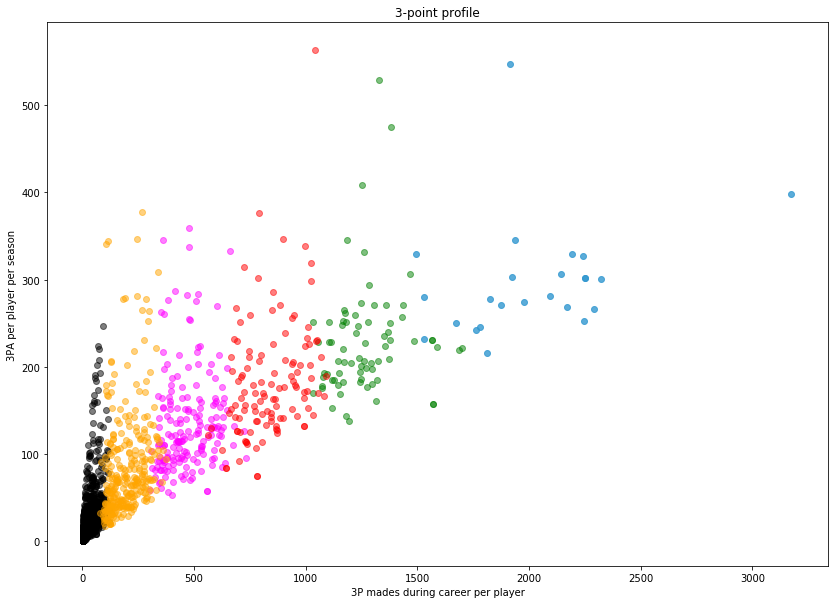

In [36]:
'''
Variables in the model:
3PA', '3P', 'year', '3PA_per_season', '3P%_career'
'''

plt.figure(figsize=plot_size)

a = '3P'
b = '3PA_per_season'
h = 0.5
h_top = 0.8

plt.scatter(group_0[a], group_0[b], c='black', alpha=h)
plt.scatter(group_1[a], group_1[b], c='green', alpha=h)
plt.scatter(group_2[a], group_2[b], c='magenta', alpha=h)
plt.scatter(group_3[a], group_3[b], c= blue, alpha=h_top)
plt.scatter(group_4[a], group_4[b], c='red', alpha=h)
plt.scatter(group_5[a], group_5[b], c='orange', alpha=h)

plt.title('3-point profile')
plt.xlabel('3P mades during career per player')
plt.ylabel('3PA per player per season')

plt.xscale('linear')
plt.yscale('linear')

plt.show()

In [26]:
# Exporting dataset 
df.to_csv(path_or_buf='data/RM-index.csv', sep=',')